# Causal Inference 

Causal inference is about testing the significance of 

In [24]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Causal Effect 

Causal effect is the slope of effect vs treatment.

''

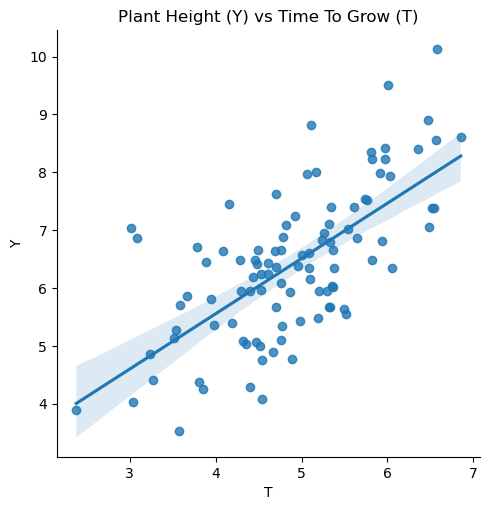

In [85]:
np.random.seed(42)
df = pd.DataFrame()
df["T"] = np.random.normal(loc = 5, scale =1, size =100)
df["Y"] = np.random.normal(loc = 1.1  * df["T"] +  1, scale  =1)
sns.lmplot(data = df , x="T", y="Y")#,ci=True)
plt.title("Plant Height (Y) vs Time To Grow (T)")
;

In [87]:
import statsmodels.formula.api as sms
sms.ols(formula='Y~T',data=df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.7237,0.523,3.295,0.001,0.685,2.762
T,0.9567,0.105,9.105,0.000,0.748,1.165


## Assesing causal Claims

Null Hypothesis; the average causal effect of a treatment


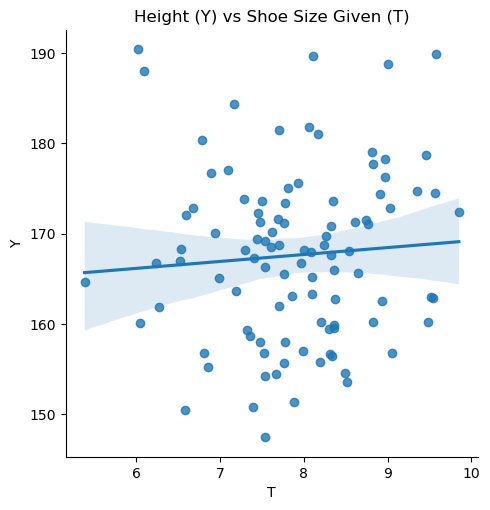

In [82]:
np.random.seed(42)
df = pd.DataFrame()
df["T"] = np.random.normal(loc = 8, scale =1, size =100)
df["Y"] = np.random.normal(loc = 2.2  * df["T"] +  150, scale  =10)

sns.lmplot(data = df , x="T", y="Y",legend=True)
plt.title("Height (Y) vs Shoe Size Given (T)");

\in 

In [83]:
import statsmodels.formula.api as sms
sms.ols(formula='Y ~ T',data = df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,161.5349,8.352,19.341,0.000,144.961,178.109
T,0.7674,1.051,0.730,0.467,-1.318,2.853


## A/B Testing

Binary treatment, random assignment. 

In [104]:
np.random.seed(42)
df = pd.DataFrame()

In [105]:
df["T"] = np.random.choice(
    a=[0,1], p=[.9,.1], size =100
)
df["Y"] = np.random.normal(
    loc = 1.1*df["T"]+10 , 
    scale  = 1.0
)

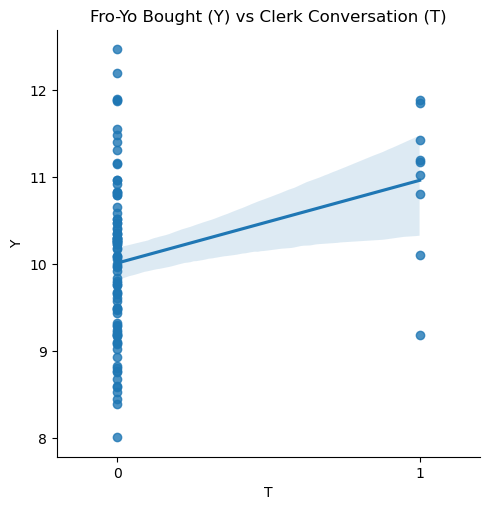

In [104]:
sns.lmplot(data = df , x="T", y="Y",legend=True)#, hue='T')
plt.xlim(left = -0.2, right =1.2)
plt.xticks(ticks = [0.0,1.0], labels =[0,1])
plt.title("Fro-Yo Bought (Y) vs Clerk Conversation (T)");

## Conditionally Random Experiments



In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def random_treatment_by_risk(risk):
    if risk == 'high':
        return np.random.choice(a=[0,1], p=[.99,.01]) 
    else: 
        return np.random.choice(a=[0,1], p=[.9,.1]) 

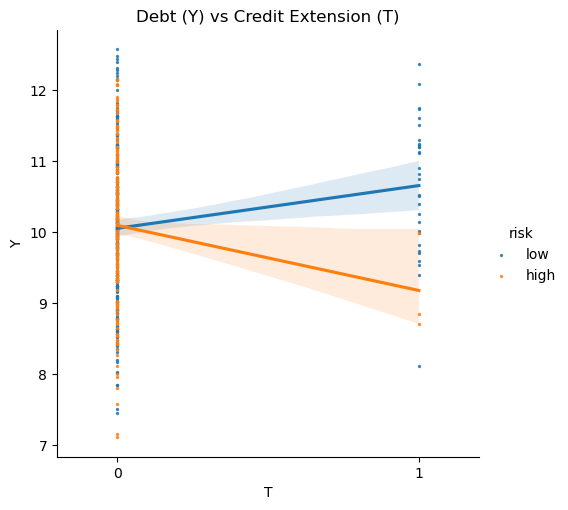

In [19]:
np.random.seed(42)
df = pd.DataFrame()
df['credit_score'] = np.random.normal(loc =460, scale =60, size = 500)
df['risk'] = df['credit_score'].apply(lambda x: "high" if x<450 else "low")
df["T"] = df['risk'].apply(random_treatment_by_risk)
risk_filter = (df['risk'] == "high")
df.loc[risk_filter,"Y"] = np.random.normal(-.8* df.loc[risk_filter,"T"] +10) 
df.loc[~risk_filter,"Y"] = np.random.normal(0.7* df.loc[~risk_filter,"T"] +10 ) 

sns.lmplot(data = df , x="T", y="Y",legend=True, hue = "risk",scatter_kws={"s": 2})
plt.xlim(left = -0.2, right =1.2)
plt.xticks(ticks = [0.0,1.0], labels =[0,1])
plt.title("Debt (Y) vs Credit Extension (T)");

## Confounding

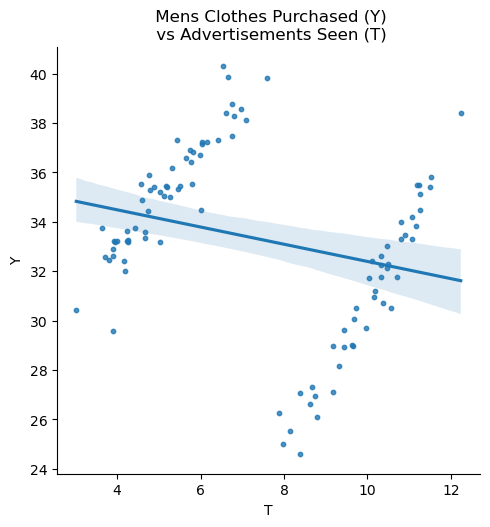

In [33]:
n = 10
np.random.seed(123)
noise = np.random.normal

df = pd.DataFrame()
df['X'] = np.random.choice(a = ["Men","Women"], size =100) 
n_men = df[df['X'] == "Wen"]
n_women = df[df['X'] == "Women"]

# generate treatment values for men
def generate_t(x):
    if x == "Men":
        return noise(loc = 5, scale = 1)
    elif x == "Women":
        return noise(loc = 10, scale = 1)
df['T'] = df["X"].apply(generate_t)
men_filter = df["X"] == "Men"
df.loc[men_filter,"Y"] =  noise(loc = 2*df.loc[men_filter,"T"] + 25, scale = 1)
df.loc[~men_filter,"Y"] = noise(loc = 3*df.loc[~men_filter,"T"] +1 , scale = 1)
# plt.figure(figsize=(12, 6))  # Specify the width and height in inches
sns.lmplot(data = df, x="T", y="Y", scatter_kws={"s": 10},)# hue = "X")
labels = [int(tick) for tick in ticks]
plt.yticks(ticks=ticks, labels=labels)
plt.title(" Mens Clothes Purchased (Y)\n vs Advertisements Seen (T)")
plt.show();

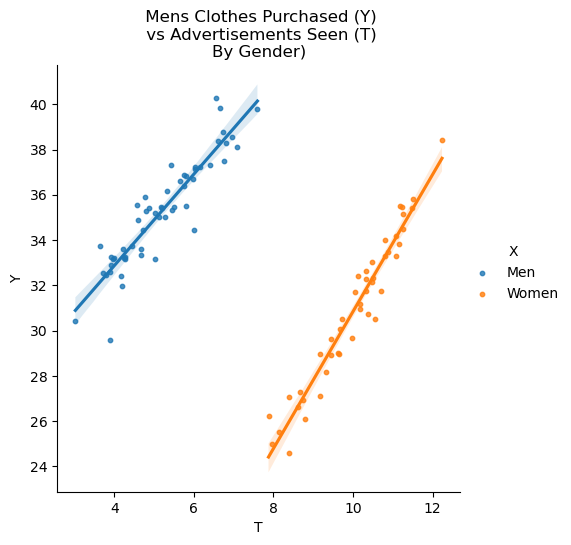

In [34]:
# Create a custom legend with the slopes
sns.lmplot(data = df, x="T", y="Y", 
           hue = "X"
          ,scatter_kws={"s": 10})
ticks = np.linspace(24,40,9)
labels = [int(tick) for tick in ticks]
plt.yticks(ticks=ticks, labels=labels)
plt.title(" Mens Clothes Purchased (Y)\n vs Advertisements Seen (T)\nBy Gender)")
plt.show();

## Binary Outcome


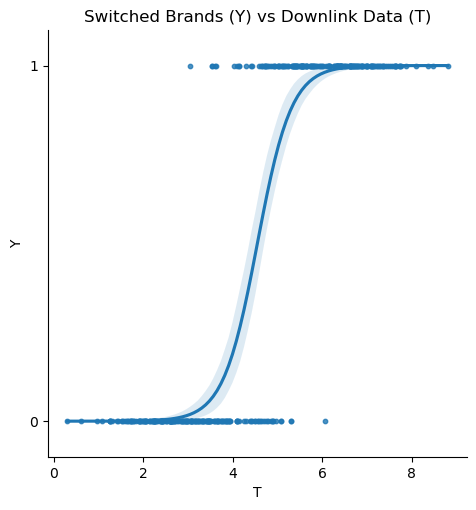

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

n=200
def generate_T_Y_df(a,b,v):
    df0 = pd.DataFrame() 
    df1 = pd.DataFrame()
    df0["T"] = np.random.normal(loc = a, scale = v, size =n) 
    df0["Y"] = 0 
    df1["T"] = np.random.normal(loc = b, scale = v, size =n)
    df1["Y"] = 1 
    df = pd.concat([df0,df1])
    df["T"] = df["T"].apply(lambda x: 0 if x<0 else x)
    return df

df = generate_T_Y_df(3,6,1)

sns.lmplot(data = df, x="T", y="Y",logistic=True, scatter_kws={"s": 10})
plt.ylim(-.1,1.1)
plt.yticks(ticks=[0,1], labels=[0,1])
plt.title("Switched Brands (Y) vs Downlink Data (T)");

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/genmod/generalized_linear_model.py:1257:

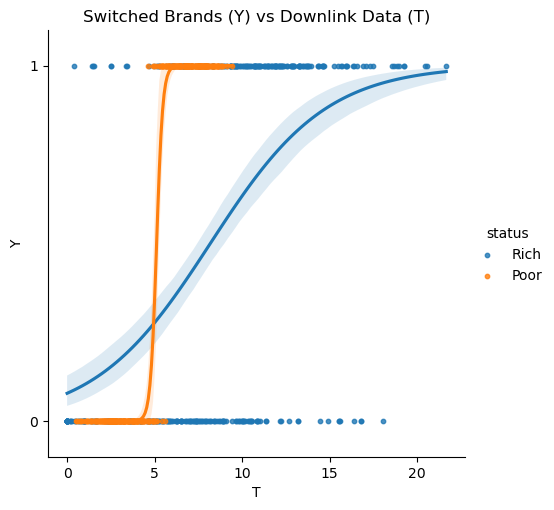

In [81]:
rich_df = generate_T_Y_df(6,10,4)
rich_df["status"] = "Rich"
poor_df = generate_T_Y_df(3,7,1)
poor_df["status"] = "Poor"

df = pd.concat([rich_df,poor_df])
sns.lmplot(data = df, x="T", y="Y", 
           hue = "status",
           logistic=True, scatter_kws={"s": 10})
plt.ylim(-.1,1.1)
plt.yticks(ticks=[0,1], labels=[0,1])
plt.title("Switched Brands (Y) vs Downlink Data (T)");

## Treatement Hererogeneity

$$ 
Y = \beta_1 \color{purple}{X T} + \beta_0 T + \delta_1 X + \delta_0\\
\implies 
\text{ATE}(X) = \frac{\partial Y}{\partial T}(X) = \beta_1 X + \beta_0
$$

Text(0.5, 1.0, 'Yearly Grocery Trips (Y) vs Ads Seen\nby N Cars (X)')

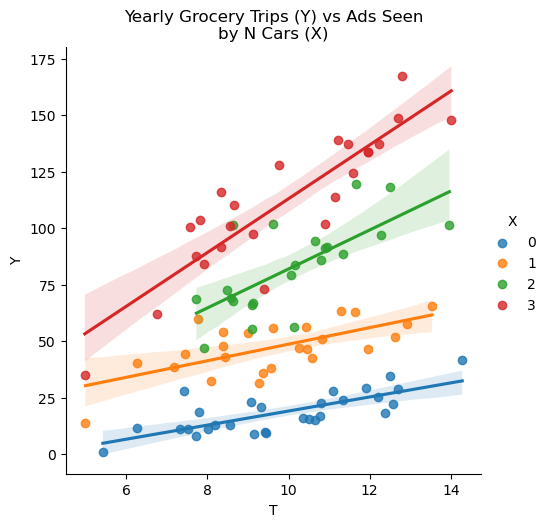

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

n = 100
df = pd.DataFrame()
# Generate a variety of people specified by their x value
df["X"] = np.random.choice(a=[0,1,2,3],size = n)
# randomly assign treatment
df["T"] = np.random.normal(10, 2, 100)
# Artificially create an X and T dependent outcome
df["Y"] = np.random.normal(  loc=3.0* df["X"]*df["T"] + 2.0*df["T"], scale = 2*df["X"]+8)

sns.lmplot(data = df, x="T", y="Y",
          hue = "X")
plt.title("Yearly Grocery Trips (Y) vs Ads Seen\nby N Cars (X)")

Text(0.5, 1.0, 'Yearly Grocery Trips (Y) vs Ads Seen')

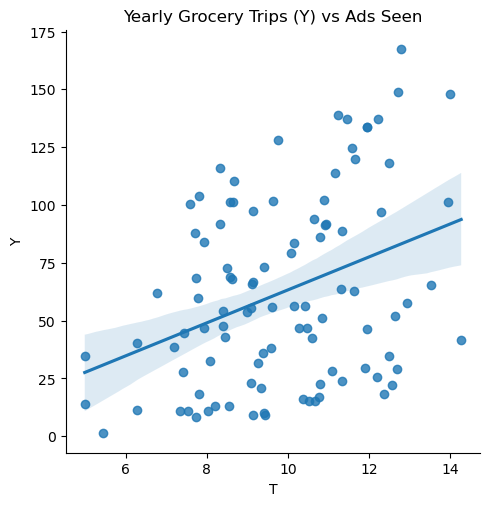

In [103]:
sns.lmplot(data = df, x="T", y="Y",
          # hue = "X"
          )
plt.title("Yearly Grocery Trips (Y) vs Ads Seen")

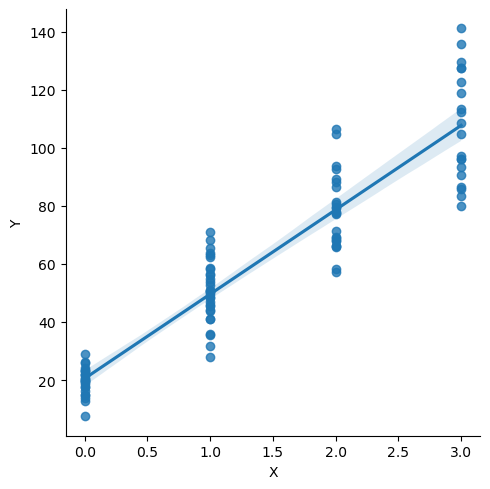

In [88]:
sns.lmplot(data = df, x="X", y="Y")

## Bias Veriance Tradeoff



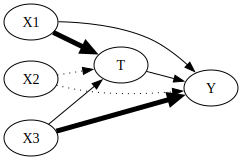

In [1]:
import graphviz as gr
# Order here seems to determine vertical order in the visualization.
g = gr.Digraph(graph_attr={"rankdir": "LR"})
g.edge("X1", "T", penwidth="5"),
g.edge("X2", "T", #penwidth="3", 
       style="dotted"),
g.edge("X3", "T", penwidth="1"),
g.edge("X1", "Y", penwidth="1"),
g.edge("X2", "Y", #penwidth="3", 
       style = "dotted"),
g.edge("X3", "Y", penwidth="5"),

g.edge("T", "Y"),

g

$X_1$ explains away variance in $T$ (and thus increases variance in $\hat{\tau}$) more than it removes bias. 

$X_3$ reduces confounder bias more than explaining variance in $T$. 

Seems to me like $X_1$ is a bad choice for variable to control for, $X_2$ is good. 

In [4]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

np.random.seed(123)
n = 100
(x1, x2, x3) = (np.random.normal(0, 1, n) for _ in range(3)) 
t = np.random.normal(10*x1 + 5*x2 + x3)
# ate = 0.05
y = np.random.normal(0.05*t + x1 + 5*x2 + 10*x3, 5)
df = pd.DataFrame(dict(y=y, t=t, x1=x1, x2=x2, x3=x3))
smf.ols("y~t+x1+x2+x3", data=df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.2707,0.527,0.514,0.608,-0.775,1.316
t,0.8664,0.607,1.427,0.157,-0.339,2.072
x1,-7.0628,6.038,-1.170,0.245,-19.049,4.923
x2,0.0143,3.128,0.005,0.996,-6.195,6.224
x3,9.6292,0.887,10.861,0.000,7.869,11.389


The 95% CI contains 0 so we can not reject $H_0: \tau =0$. This is because the variance in $T$ is too big because $X_1$ is explaining away variance in $T$ and thus increasing variance in $\hat{\tau}$.

Removing $X_1$ from the fit, the 95% CI fot $\hat{\tau}$ no longer contains 0 and thus the null hypothesis can be rejected.  



In [9]:
smf.ols("y~t+x2+x3", data=df).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.1889,0.523,0.361,0.719,-0.849,1.227
t,0.1585,0.046,3.410,0.001,0.066,0.251
x2,3.6095,0.582,6.197,0.000,2.453,4.766
x3,10.4549,0.537,19.453,0.000,9.388,11.522
